In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##  October 10, 2021   ##
##                     ##
#########################

In [2]:
# Taken from Izenman Manifold_Modern_Multivariate Statistical

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

In [4]:
dat = load_breast_cancer(return_X_y = True, as_frame = True)

X = dat[0]
y = dat[1]
p = X.shape[1]

np.linalg.cond(X)

1485362.3170257595

In [5]:
X = X.mask(X == 0).fillna(0.001)
X = np.log(X)

np.linalg.cond(X)

6700.58233949742

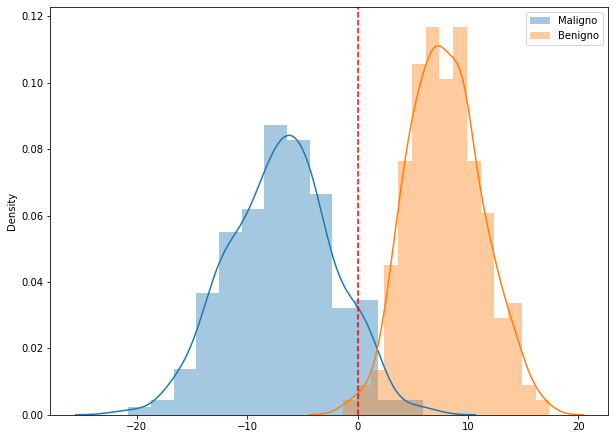

In [6]:
y_M = y[y == 0]
X_M = X.iloc[y_M.index]
n_M = X_M.shape[0]
mean_M = np.array(X_M.mean()).reshape(p, 1)
S_M = X_M.cov()

y_B = y[y == 1]
X_B = X.iloc[y_B.index]
n_B = X_B.shape[0]
mean_B = np.array(X_B.mean()).reshape(p, 1)
S_B = X_B.cov()

n = n_B + n_M
S = ((n_B-1)*S_B + (n_M-1)*S_M)/(n-2)
pi_M = n_M/n
pi_B = n_B/n

# discriminant function (coefficients)
b  = np.linalg.solve(S, mean_B-mean_M)
b0 = np.log(pi_B/pi_M) - 1/2 * (mean_B + mean_M).T @ b

scores_M = b0 + X_M @ b
scores_B = b0 + X_B @ b

plt.figure(figsize = (10,7.5))
sns.distplot(scores_M, label = 'Maligno')
sns.distplot(scores_B, label = 'Benigno')
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.legend()

In [7]:
# How good is the classifier ?
round((100*((scores_M > 0).sum() + (scores_B < 0).sum())/n).values[0],2)

3.34

In [12]:
# We can use CV to get a more realistic estimation of the error
classifCV = []
classify_sklearn = []

for i in range(n):
    X_i = X.iloc[i]
    y_i = y.iloc[i]

    y_mi = y.drop(i)

    y_M = y_mi[y_mi == 0]
    X_M = X.iloc[y_M.index]
    n_M = X_M.shape[0]
    mean_M = np.array(X_M.mean()).reshape(p, 1)
    S_M = X_M.cov()

    y_B = y_mi[y_mi == 1]
    X_B = X.iloc[y_B.index]
    n_B = X_B.shape[0]
    mean_B = np.array(X_B.mean()).reshape(p, 1)
    S_B = X_B.cov()

    n_cv = n_B + n_M
    S = ((n_B-1)*S_B + (n_M-1)*S_M)/(n_cv-2)
    pi_M = n_M/n_cv
    pi_B = n_B/n_cv

    # discriminant function (coefficients)
    b  = np.linalg.solve(S, (mean_B - mean_M))
    b0 = np.log(pi_B/pi_M) - 1/2 * (mean_B + mean_M).T @ b

    score = b0 + X_i @ b
    classifCV.append(0) if score < 0  else classifCV.append(1)

    lda = LinearDiscriminantAnalysis()
    lda.fit(pd.concat([X_M, X_B]), pd.concat([y_M, y_B]))
    classify_sklearn.append(lda.predict(np.array([X_i])))

In [14]:
conf_matrix = confusion_matrix(y, classifCV)
round(100*(1-sum(np.diag(conf_matrix))/n),2)

4.22

In [15]:
conf_matrix_sklearn = confusion_matrix(y, classify_sklearn)
round(100*(1-sum(np.diag(conf_matrix))/n),2)

4.22